In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [128]:
train = pd.read_csv('/run/media/devesh/Files/Projects/Demand Forecasting/input/train.csv')

In [3]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [4]:
len(train)

150150

In [6]:
train.week.unique()

array(['17/01/11', '24/01/11', '31/01/11', '07/02/11', '14/02/11',
       '21/02/11', '28/02/11', '07/03/11', '14/03/11', '21/03/11',
       '28/03/11', '04/04/11', '11/04/11', '18/04/11', '25/04/11',
       '02/05/11', '09/05/11', '16/05/11', '23/05/11', '30/05/11',
       '06/06/11', '13/06/11', '20/06/11', '27/06/11', '04/07/11',
       '11/07/11', '18/07/11', '25/07/11', '01/08/11', '08/08/11',
       '15/08/11', '22/08/11', '29/08/11', '05/09/11', '12/09/11',
       '19/09/11', '26/09/11', '03/10/11', '10/10/11', '17/10/11',
       '24/10/11', '31/10/11', '07/11/11', '14/11/11', '21/11/11',
       '28/11/11', '05/12/11', '12/12/11', '19/12/11', '26/12/11',
       '02/01/12', '09/01/12', '16/01/12', '23/01/12', '30/01/12',
       '06/02/12', '13/02/12', '20/02/12', '27/02/12', '06/03/12',
       '13/03/12', '20/03/12', '27/03/12', '03/04/12', '10/04/12',
       '17/04/12', '24/04/12', '01/05/12', '08/05/12', '15/05/12',
       '22/05/12', '29/05/12', '05/06/12', '12/06/12', '19/06/

In [7]:
train.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

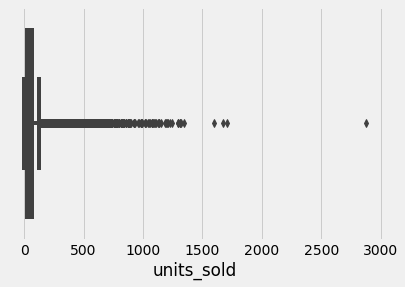

In [8]:
sns.boxplot(train.units_sold)

In [16]:
greater_62 = train.loc[train['units_sold'] >= 500.0]

In [17]:
greater_62.week.unique()

array(['14/02/11', '21/02/11', '28/02/11', '07/03/11', '09/05/11',
       '16/05/11', '23/05/11', '04/07/11', '11/07/11', '08/08/11',
       '22/08/11', '03/10/11', '17/10/11', '24/10/11', '07/11/11',
       '21/11/11', '28/11/11', '12/12/11', '19/12/11', '26/12/11',
       '16/01/12', '06/03/12', '01/05/12', '08/05/12', '15/05/12',
       '22/05/12', '03/07/12', '10/07/12', '17/07/12', '14/08/12',
       '25/09/12', '02/10/12', '06/11/12', '13/11/12', '27/11/12',
       '04/12/12', '11/12/12', '18/12/12', '25/12/12', '01/01/13',
       '12/02/13', '19/02/13', '26/02/13', '23/04/13', '07/05/13',
       '14/05/13', '21/05/13', '28/05/13', '25/06/13', '09/07/13'],
      dtype=object)

In [11]:
train.store_id.value_counts()

8094    3120
9823    2990
8991    2990
8438    2730
8023    2730
        ... 
8091    1170
9439    1170
9178     780
9700     650
9001     260
Name: store_id, Length: 76, dtype: int64

In [129]:
test = pd.read_csv('/run/media/devesh/Files/Projects/Demand Forecasting/input/test.csv')

In [130]:
train['Split'] = 'Train'
test['Split'] = 'Test'

In [131]:
df = pd.concat([train, test], axis = 0)

In [132]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20.0,Train
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28.0,Train
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19.0,Train
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44.0,Train
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52.0,Train


In [26]:
df.tail()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
164005,232281,01/10/13,9984,223245,241.5375,241.5375,0,0,NaN
164006,232282,01/10/13,9984,223153,240.8250,240.8250,0,0,NaN
164007,232285,01/10/13,9984,245338,382.6125,401.8500,1,1,NaN
164008,232286,01/10/13,9984,547934,191.6625,191.6625,0,0,NaN
164009,232287,01/10/13,9984,679023,234.4125,234.4125,0,0,NaN


In [94]:
df = df.drop(['record_ID'], axis = 1)

In [28]:
df.head()

,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,17/01/11,8091,216418,99.0375,111.8625,0,0,20.0
1,17/01/11,8091,216419,99.0375,99.0375,0,0,28.0
2,17/01/11,8091,216425,133.9500,133.9500,0,0,19.0
3,17/01/11,8091,216233,133.9500,133.9500,0,0,44.0
4,17/01/11,8091,217390,141.0750,141.0750,0,0,52.0


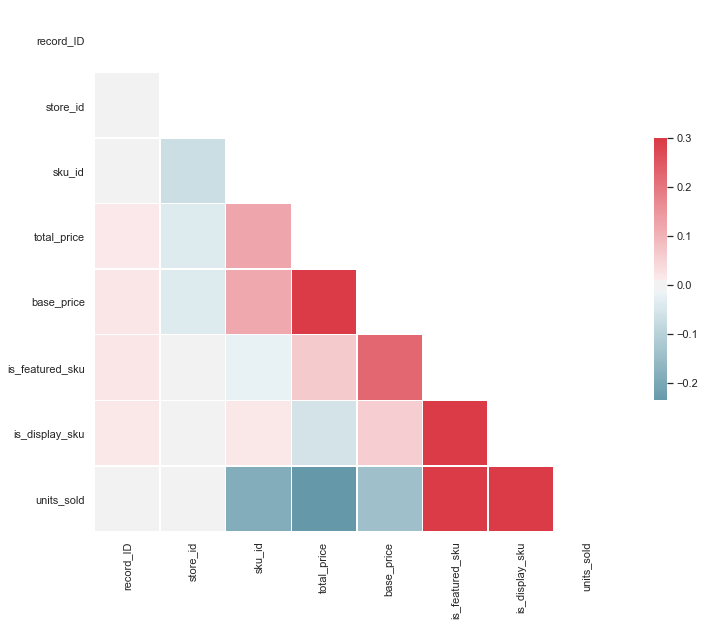

In [133]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
df.base_price.describe()

count    164010.000000
mean        219.805933
std         110.351869
min          61.275000
25%         133.237500
50%         208.050000
75%         235.837500
max         562.162500
Name: base_price, dtype: float64

In [134]:
df['discount_%'] = ((df['base_price'] - df['total_price'])/df['base_price'])*100

In [135]:
df['featured_display'] = df['is_featured_sku'] ^ df['is_display_sku']

In [136]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,discount_%,featured_display
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20.0,Train,11.464968,0
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28.0,Train,0.000000,0
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19.0,Train,0.000000,0
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44.0,Train,0.000000,0
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52.0,Train,0.000000,0


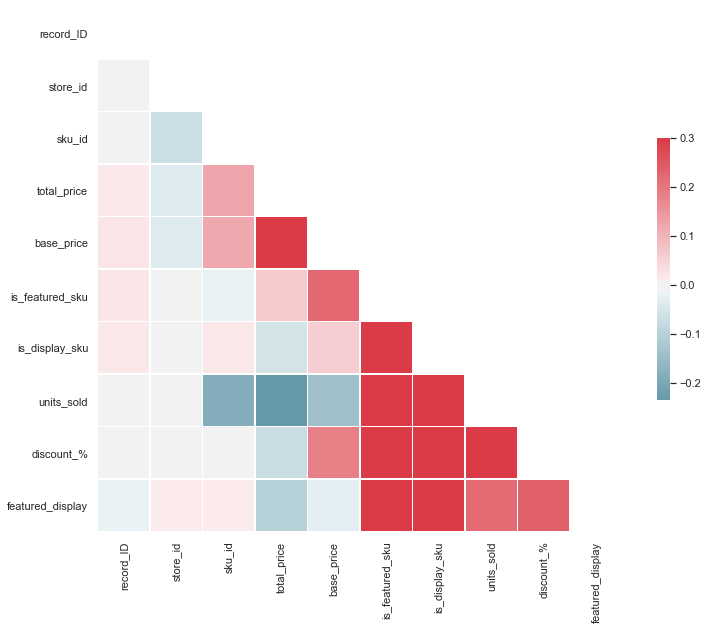

In [137]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [138]:
df['week'] = pd.to_datetime(df.week)

In [139]:
from datetime import datetime
from datetime import timedelta

df['DateType'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in df['week'].astype(str).values.tolist()]

In [140]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,discount_%,featured_display,DateType
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,Train,11.464968,0,2011-01-17
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,Train,0.000000,0,2011-01-17
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,Train,0.000000,0,2011-01-17
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,Train,0.000000,0,2011-01-17
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,Train,0.000000,0,2011-01-17


In [141]:
df['Month'] = [date.month for date in df['DateType']]

In [54]:
df.head()

,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,discount_%,featured_display,DateType,Month
0,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,Train,11.464968,0,2011-01-17,1
1,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,Train,0.000000,0,2011-01-17,1
2,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,Train,0.000000,0,2011-01-17,1
3,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,Train,0.000000,0,2011-01-17,1
4,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,Train,0.000000,0,2011-01-17,1


In [142]:
df['store_id'] = 'Store_' + df['store_id'].map(str)
df['sku_id'] = 'Product_' + df['sku_id'].map(str)
df['Month'] = 'Month_' + df['Month'].map(str)

In [56]:
df.head()

,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,discount_%,featured_display,DateType,Month
0,2011-01-17,Store_8091,Product_216418,99.0375,111.8625,0,0,20.0,Train,11.464968,0,2011-01-17,Month_1
1,2011-01-17,Store_8091,Product_216419,99.0375,99.0375,0,0,28.0,Train,0.000000,0,2011-01-17,Month_1
2,2011-01-17,Store_8091,Product_216425,133.9500,133.9500,0,0,19.0,Train,0.000000,0,2011-01-17,Month_1
3,2011-01-17,Store_8091,Product_216233,133.9500,133.9500,0,0,44.0,Train,0.000000,0,2011-01-17,Month_1
4,2011-01-17,Store_8091,Product_217390,141.0750,141.0750,0,0,52.0,Train,0.000000,0,2011-01-17,Month_1


In [143]:
medians = pd.DataFrame({'Median Sales' :df.loc[df['Split']=='Train'].groupby(by=['store_id','sku_id','Month'])['units_sold'].median()}).reset_index()
medians.head()

,store_id,sku_id,Month,Median Sales
0,Store_8023,Product_216233,Month_1,112.0
1,Store_8023,Product_216233,Month_10,127.0
2,Store_8023,Product_216233,Month_11,121.0
3,Store_8023,Product_216233,Month_12,118.0
4,Store_8023,Product_216233,Month_2,131.0


In [144]:
df = df.merge(medians, how = 'outer', on = ['store_id','sku_id','Month'])

In [93]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,discount_%,featured_display,DateType,Month,Median Sales
0,1,2011-01-17,Store_8091,Product_216418,99.0375,111.8625,0,0,20.0,Train,11.464968,0,2011-01-17,Month_1,28.5
1,1641,2011-01-24,Store_8091,Product_216418,99.0375,111.8625,0,0,34.0,Train,11.464968,0,2011-01-24,Month_1,28.5
2,3277,2011-01-31,Store_8091,Product_216418,96.9000,96.9000,0,0,10.0,Train,0.000000,0,2011-01-31,Month_1,28.5
3,45785,2011-01-08,Store_8091,Product_216418,87.6375,119.7000,0,0,12.0,Train,26.785714,0,2011-01-08,Month_1,28.5
4,84981,2012-01-16,Store_8091,Product_216418,88.3500,106.1625,1,1,52.0,Train,16.778523,0,2012-01-16,Month_1,28.5


In [145]:
df['Median Sales'].fillna(df['Median Sales'].loc[df['Split']=='Train'].median(), inplace=True)

In [96]:
df.head()

,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,discount_%,featured_display,DateType,Month,Median Sales
0,2011-01-17,Store_8091,Product_216418,99.0375,111.8625,0,0,20.0,Train,11.464968,0,2011-01-17,Month_1,28.5
1,2011-01-24,Store_8091,Product_216418,99.0375,111.8625,0,0,34.0,Train,11.464968,0,2011-01-24,Month_1,28.5
2,2011-01-31,Store_8091,Product_216418,96.9000,96.9000,0,0,10.0,Train,0.000000,0,2011-01-31,Month_1,28.5
3,2011-01-08,Store_8091,Product_216418,87.6375,119.7000,0,0,12.0,Train,26.785714,0,2011-01-08,Month_1,28.5
4,2012-01-16,Store_8091,Product_216418,88.3500,106.1625,1,1,52.0,Train,16.778523,0,2012-01-16,Month_1,28.5


In [146]:
df['Key'] = df['store_id'].map(str)+df['sku_id'].map(str)+df['Month'].map(str)+df['week'].map(str)

In [98]:
df.head()

,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,discount_%,featured_display,DateType,Month,Median Sales,Key
0,2011-01-17,Store_8091,Product_216418,99.0375,111.8625,0,0,20.0,Train,11.464968,0,2011-01-17,Month_1,28.5,Store_8091Product_216418Month_12011-01-17 00:0...
1,2011-01-24,Store_8091,Product_216418,99.0375,111.8625,0,0,34.0,Train,11.464968,0,2011-01-24,Month_1,28.5,Store_8091Product_216418Month_12011-01-24 00:0...
2,2011-01-31,Store_8091,Product_216418,96.9000,96.9000,0,0,10.0,Train,0.000000,0,2011-01-31,Month_1,28.5,Store_8091Product_216418Month_12011-01-31 00:0...
3,2011-01-08,Store_8091,Product_216418,87.6375,119.7000,0,0,12.0,Train,26.785714,0,2011-01-08,Month_1,28.5,Store_8091Product_216418Month_12011-01-08 00:0...
4,2012-01-16,Store_8091,Product_216418,88.3500,106.1625,1,1,52.0,Train,16.778523,0,2012-01-16,Month_1,28.5,Store_8091Product_216418Month_12012-01-16 00:0...


In [147]:
df['DateLagged'] = df['DateType']- timedelta(days=7)
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,discount_%,featured_display,DateType,Month,Median Sales,Key,DateLagged
0,1,2011-01-17,Store_8091,Product_216418,99.0375,111.8625,0,0,20.0,Train,11.464968,0,2011-01-17,Month_1,28.5,Store_8091Product_216418Month_12011-01-17 00:0...,2011-01-10
1,1641,2011-01-24,Store_8091,Product_216418,99.0375,111.8625,0,0,34.0,Train,11.464968,0,2011-01-24,Month_1,28.5,Store_8091Product_216418Month_12011-01-24 00:0...,2011-01-17
2,3277,2011-01-31,Store_8091,Product_216418,96.9000,96.9000,0,0,10.0,Train,0.000000,0,2011-01-31,Month_1,28.5,Store_8091Product_216418Month_12011-01-31 00:0...,2011-01-24
3,45785,2011-01-08,Store_8091,Product_216418,87.6375,119.7000,0,0,12.0,Train,26.785714,0,2011-01-08,Month_1,28.5,Store_8091Product_216418Month_12011-01-08 00:0...,2011-01-01
4,84981,2012-01-16,Store_8091,Product_216418,88.3500,106.1625,1,1,52.0,Train,16.778523,0,2012-01-16,Month_1,28.5,Store_8091Product_216418Month_12012-01-16 00:0...,2012-01-09


In [148]:
sorted_df = df.sort_values(['store_id', 'sku_id','DateType'], ascending=[1, 1,1])
sorted_df = sorted_df.reset_index(drop=True)

In [149]:
sorted_df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,discount_%,featured_display,DateType,Month,Median Sales,Key,DateLagged
0,45883,2011-01-08,Store_8023,Product_216233,133.9500,133.9500,0,0,119.0,Train,0.0,0,2011-01-08,Month_1,112.0,Store_8023Product_216233Month_12011-01-08 00:0...,2011-01-01
1,99,2011-01-17,Store_8023,Product_216233,134.6625,134.6625,0,0,114.0,Train,0.0,0,2011-01-17,Month_1,112.0,Store_8023Product_216233Month_12011-01-17 00:0...,2011-01-10
2,1739,2011-01-24,Store_8023,Product_216233,133.9500,133.9500,0,0,87.0,Train,0.0,0,2011-01-24,Month_1,112.0,Store_8023Product_216233Month_12011-01-24 00:0...,2011-01-17
3,3375,2011-01-31,Store_8023,Product_216233,133.9500,133.9500,0,0,135.0,Train,0.0,0,2011-01-31,Month_1,112.0,Store_8023Product_216233Month_12011-01-31 00:0...,2011-01-24
4,24612,2011-02-05,Store_8023,Product_216233,133.9500,133.9500,0,0,98.0,Train,0.0,0,2011-02-05,Month_2,131.0,Store_8023Product_216233Month_22011-02-05 00:0...,2011-01-29


In [150]:
sorted_df['LaggedSales'] = np.nan # Initialize column
sorted_df['LaggedAvailable'] = np.nan # Initialize column
last=df.loc[0] # intialize last row for first iteration. Doesn't really matter what it is
row_len = sorted_df.shape[0]
for index, row in sorted_df.iterrows():
    lag_date = row["DateLagged"]
    # Check if it matches by comparing last weeks value to the compared date 
    # And if weekly sales aren't 0
    if((last['DateType']== lag_date) & (last['units_sold']>0)): 
        sorted_df.at[index, 'LaggedSales'] = last['units_sold']
        sorted_df.at[index, 'LaggedAvailable'] = 1
    else:
        sorted_df.at[index, 'LaggedSales'] = row['Median Sales'] # Fill with median
        sorted_df.at[index, 'LaggedAvailable'] = 0

    last = row #Remember last row for speed
    if(index%int(row_len/10)==0): #See progress by printing every 10% interval
        print(str(int(index*100/row_len))+'% loaded')



0% loaded
10% loaded
20% loaded
30% loaded
40% loaded
50% loaded
60% loaded
70% loaded
80% loaded
90% loaded


In [151]:
sorted_df[['store_id', 'sku_id','DateType','LaggedSales','units_sold','Median Sales']].head()

,store_id,sku_id,DateType,LaggedSales,units_sold,Median Sales
0,Store_8023,Product_216233,2011-01-08,112.0,119.0,112.0
1,Store_8023,Product_216233,2011-01-17,112.0,114.0,112.0
2,Store_8023,Product_216233,2011-01-24,114.0,87.0,112.0
3,Store_8023,Product_216233,2011-01-31,87.0,135.0,112.0
4,Store_8023,Product_216233,2011-02-05,131.0,98.0,131.0


In [77]:
df = df.drop(['Median Sales_y'], axis = 1)

In [78]:
df['Median_Sales'] = df['Median Sales_x']

In [79]:
df = df.drop(['Median Sales_x'], axis = 1)

In [152]:
df = df.merge(sorted_df[['store_id', 'sku_id','DateType','LaggedSales','LaggedAvailable']], how = 'inner', on = ['store_id', 'sku_id','DateType'])

In [153]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,discount_%,featured_display,DateType,Month,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable
0,1,2011-01-17,Store_8091,Product_216418,99.0375,111.8625,0,0,20.0,Train,11.464968,0,2011-01-17,Month_1,28.5,Store_8091Product_216418Month_12011-01-17 00:0...,2011-01-10,28.5,0.0
1,1641,2011-01-24,Store_8091,Product_216418,99.0375,111.8625,0,0,34.0,Train,11.464968,0,2011-01-24,Month_1,28.5,Store_8091Product_216418Month_12011-01-24 00:0...,2011-01-17,20.0,1.0
2,3277,2011-01-31,Store_8091,Product_216418,96.9000,96.9000,0,0,10.0,Train,0.000000,0,2011-01-31,Month_1,28.5,Store_8091Product_216418Month_12011-01-31 00:0...,2011-01-24,34.0,1.0
3,45785,2011-01-08,Store_8091,Product_216418,87.6375,119.7000,0,0,12.0,Train,26.785714,0,2011-01-08,Month_1,28.5,Store_8091Product_216418Month_12011-01-08 00:0...,2011-01-01,28.5,0.0
4,84981,2012-01-16,Store_8091,Product_216418,88.3500,106.1625,1,1,52.0,Train,16.778523,0,2012-01-16,Month_1,28.5,Store_8091Product_216418Month_12012-01-16 00:0...,2012-01-09,28.5,0.0


In [106]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,Train
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,Train
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,Train
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,Train
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,Train


In [154]:
df['Sales_dif'] = df['Median Sales'] - df['LaggedSales']
df[['store_id', 'sku_id','DateType','LaggedSales','units_sold','Median Sales']].head()

,store_id,sku_id,DateType,LaggedSales,units_sold,Median Sales
0,Store_8091,Product_216418,2011-01-17,28.5,20.0,28.5
1,Store_8091,Product_216418,2011-01-24,20.0,34.0,28.5
2,Store_8091,Product_216418,2011-01-31,34.0,10.0,28.5
3,Store_8091,Product_216418,2011-01-08,28.5,12.0,28.5
4,Store_8091,Product_216418,2012-01-16,28.5,52.0,28.5


In [155]:
df['Difference'] = df['Median Sales'] - df['units_sold']

In [156]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,...,featured_display,DateType,Month,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,1,2011-01-17,Store_8091,Product_216418,99.0375,111.8625,0,0,20.0,Train,...,0,2011-01-17,Month_1,28.5,Store_8091Product_216418Month_12011-01-17 00:0...,2011-01-10,28.5,0.0,0.0,8.5
1,1641,2011-01-24,Store_8091,Product_216418,99.0375,111.8625,0,0,34.0,Train,...,0,2011-01-24,Month_1,28.5,Store_8091Product_216418Month_12011-01-24 00:0...,2011-01-17,20.0,1.0,8.5,-5.5
2,3277,2011-01-31,Store_8091,Product_216418,96.9000,96.9000,0,0,10.0,Train,...,0,2011-01-31,Month_1,28.5,Store_8091Product_216418Month_12011-01-31 00:0...,2011-01-24,34.0,1.0,-5.5,18.5
3,45785,2011-01-08,Store_8091,Product_216418,87.6375,119.7000,0,0,12.0,Train,...,0,2011-01-08,Month_1,28.5,Store_8091Product_216418Month_12011-01-08 00:0...,2011-01-01,28.5,0.0,0.0,16.5
4,84981,2012-01-16,Store_8091,Product_216418,88.3500,106.1625,1,1,52.0,Train,...,0,2012-01-16,Month_1,28.5,Store_8091Product_216418Month_12012-01-16 00:0...,2012-01-09,28.5,0.0,0.0,-23.5


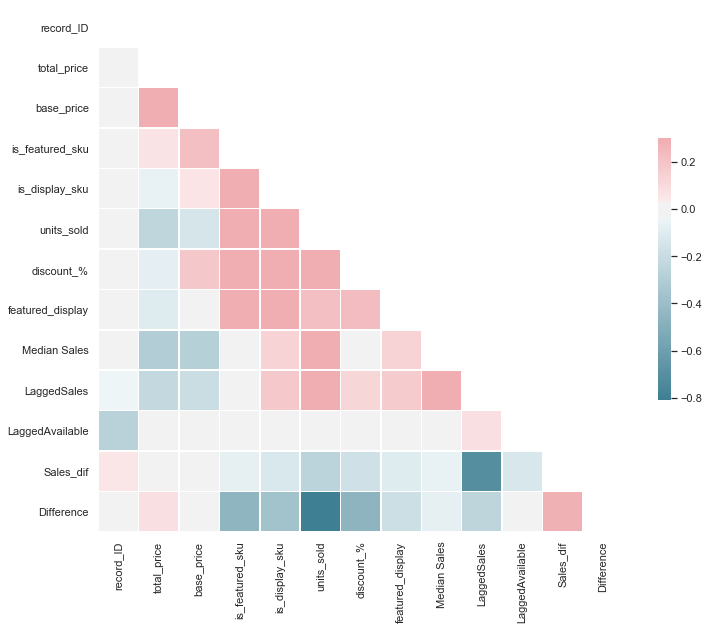

In [157]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [112]:
df.head()

,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,discount_%,featured_display,DateType,Month,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,2011-01-17,Store_8091,Product_216418,99.0375,111.8625,0,0,20.0,Train,11.464968,0,2011-01-17,Month_1,28.5,Store_8091Product_216418Month_12011-01-17 00:0...,2011-01-10,28.5,0.0,0.0,8.5
1,2011-01-24,Store_8091,Product_216418,99.0375,111.8625,0,0,34.0,Train,11.464968,0,2011-01-24,Month_1,28.5,Store_8091Product_216418Month_12011-01-24 00:0...,2011-01-17,20.0,1.0,8.5,-5.5
2,2011-01-31,Store_8091,Product_216418,96.9000,96.9000,0,0,10.0,Train,0.000000,0,2011-01-31,Month_1,28.5,Store_8091Product_216418Month_12011-01-31 00:0...,2011-01-24,34.0,1.0,-5.5,18.5
3,2011-01-08,Store_8091,Product_216418,87.6375,119.7000,0,0,12.0,Train,26.785714,0,2011-01-08,Month_1,28.5,Store_8091Product_216418Month_12011-01-08 00:0...,2011-01-01,28.5,0.0,0.0,16.5
4,2012-01-16,Store_8091,Product_216418,88.3500,106.1625,1,1,52.0,Train,16.778523,0,2012-01-16,Month_1,28.5,Store_8091Product_216418Month_12012-01-16 00:0...,2012-01-09,28.5,0.0,0.0,-23.5


In [237]:
selector = [
    #'Month',
    'total_price',
    'base_price',
    'is_featured_sku',
    'is_display_sku',
    'discount_%',
    'featured_display',   
    'LaggedSales',
    'Sales_dif',
    'LaggedAvailable'
    ]

In [215]:
display(df[selector].describe())
display(df[selector].head())

,base_price,is_featured_sku,is_display_sku,discount_%,featured_display,LaggedSales,Sales_dif,LaggedAvailable
count,164010.000000,164010.000000,164010.000000,164009.000000,164010.000000,164010.000000,164010.000000,164010.000000
mean,219.805933,0.094848,0.133211,4.830415,0.116042,47.925630,-3.612981,0.415493
std,110.351869,0.293006,0.339804,10.215728,0.320276,49.970421,33.423862,0.492808
min,61.275000,0.000000,0.000000,-51.515152,0.000000,1.000000,-2717.000000,0.000000
25%,133.237500,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
50%,208.050000,0.000000,0.000000,0.000000,0.000000,34.500000,0.000000,0.000000
75%,235.837500,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000,1.000000
max,562.162500,1.000000,1.000000,82.370821,1.000000,2876.000000,327.000000,1.000000


,base_price,is_featured_sku,is_display_sku,discount_%,featured_display,LaggedSales,Sales_dif,LaggedAvailable
0,111.8625,0,0,11.464968,0,28.5,0.0,0.0
1,111.8625,0,0,11.464968,0,20.0,8.5,1.0
2,96.9000,0,0,0.000000,0,34.0,-5.5,1.0
3,119.7000,0,0,26.785714,0,28.5,0.0,0.0
4,106.1625,1,1,16.778523,0,28.5,0.0,0.0


In [238]:
train = df.loc[df['Split']=='Train']
test = df.loc[df['Split']=='Test']
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,...,featured_display,DateType,Month,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
12,230646,2013-01-10,Store_8091,Product_216418,107.5875,107.5875,0,0,NaN,Test,...,0,2013-01-10,Month_1,28.5,Store_8091Product_216418Month_12013-01-10 00:0...,2013-01-03,28.5,0.0,0.0,NaN
25,230647,2013-01-10,Store_8091,Product_216419,110.4375,110.4375,0,0,NaN,Test,...,0,2013-01-10,Month_1,33.0,Store_8091Product_216419Month_12013-01-10 00:0...,2013-01-03,33.0,0.0,0.0,NaN
38,230648,2013-01-10,Store_8091,Product_216425,134.6625,134.6625,0,0,NaN,Test,...,0,2013-01-10,Month_1,25.5,Store_8091Product_216425Month_12013-01-10 00:0...,2013-01-03,25.5,0.0,0.0,NaN
51,230649,2013-01-10,Store_8091,Product_216233,133.2375,133.2375,0,0,NaN,Test,...,0,2013-01-10,Month_1,27.5,Store_8091Product_216233Month_12013-01-10 00:0...,2013-01-03,27.5,0.0,0.0,NaN
64,230650,2013-01-10,Store_8091,Product_217390,176.7000,176.7000,0,0,NaN,Test,...,0,2013-01-10,Month_1,30.5,Store_8091Product_217390Month_12013-01-10 00:0...,2013-01-03,30.5,0.0,0.0,NaN


In [161]:
test_org = pd.read_csv('/run/media/devesh/Files/Projects/Demand Forecasting/input/test.csv')

In [162]:
test_org.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [239]:
test = test.sort_values('record_ID')

In [240]:
train['total_price'] = train['total_price'].fillna(469.5375)
train['discount_%'] = train['discount_%'].fillna(0.0)

<ipython-input-240-b0621a9cde4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total_price'] = train['total_price'].fillna(469.5375)
<ipython-input-240-b0621a9cde4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['discount_%'] = train['discount_%'].fillna(0.0)


In [241]:
train.isnull().sum()

record_ID           0
week                0
store_id            0
sku_id              0
total_price         0
base_price          0
is_featured_sku     0
is_display_sku      0
units_sold          0
Split               0
discount_%          0
featured_display    0
DateType            0
Month               0
Median Sales        0
Key                 0
DateLagged          0
LaggedSales         0
LaggedAvailable     0
Sales_dif           0
Difference          0
dtype: int64

In [235]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,...,featured_display,DateType,Month,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,1,2011-01-17,Store_8091,Product_216418,99.0375,111.8625,0,0,20.0,Train,...,0,2011-01-17,Month_1,28.5,Store_8091Product_216418Month_12011-01-17 00:0...,2011-01-10,28.5,0.0,0.0,8.5
1,1641,2011-01-24,Store_8091,Product_216418,99.0375,111.8625,0,0,34.0,Train,...,0,2011-01-24,Month_1,28.5,Store_8091Product_216418Month_12011-01-24 00:0...,2011-01-17,20.0,1.0,8.5,-5.5
2,3277,2011-01-31,Store_8091,Product_216418,96.9000,96.9000,0,0,10.0,Train,...,0,2011-01-31,Month_1,28.5,Store_8091Product_216418Month_12011-01-31 00:0...,2011-01-24,34.0,1.0,-5.5,18.5
3,45785,2011-01-08,Store_8091,Product_216418,87.6375,119.7000,0,0,12.0,Train,...,0,2011-01-08,Month_1,28.5,Store_8091Product_216418Month_12011-01-08 00:0...,2011-01-01,28.5,0.0,0.0,16.5
4,84981,2012-01-16,Store_8091,Product_216418,88.3500,106.1625,1,1,52.0,Train,...,0,2012-01-16,Month_1,28.5,Store_8091Product_216418Month_12012-01-16 00:0...,2012-01-09,28.5,0.0,0.0,-23.5


In [242]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_dev, y_train, y_dev = train_test_split(train[selector], train['Difference'], test_size=0.2, random_state=42)
print(X_dev.shape)
print(y_dev.shape)

(30030, 9)
(30030,)


In [221]:
from xgboost import XGBRegressor

regr = XGBRegressor(n_estimators=20)

regr.fit(X_train, y_train.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [249]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=80, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=-1, random_state=None, 
                      verbose=1, warm_start=False)

regr.fit(X_train, y_train.ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    8.0s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=1, warm_start=False)

In [250]:
y_pred_random = regr.predict(X_dev)

# y_dev = y_dev.to_frame()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:    0.3s finished


In [230]:
X_dev.loc[X_dev['discount_%'].isnull()]

,base_price,is_featured_sku,is_display_sku,discount_%,featured_display,LaggedSales,Sales_dif,LaggedAvailable
66822,469.5375,0,0,NaN,0,4.0,3.5,1.0


In [169]:
# # Transform forest predictions to observe direction of change
# direction_true1= binary(y_dev.values)
# direction_predict = binary(y_pred_random)

# ## show confusion matrix random forest
# cnf_matrix = confusion_matrix(direction_true1, direction_predict)

# fig, ax = plt.subplots(1)
# ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
# #ax.set_xticklabels(abbreviation)
# #ax.set_yticklabels(abbreviation)
# plt.title('Confusion matrix of random forest predictions')
# plt.ylabel('True category')
# plt.xlabel('Predicted category')
# plt.show();

In [251]:
y_dev['Predicted'] = y_pred_random
df_out = pd.merge(train,y_dev[['Predicted']],how = 'left',left_index = True, right_index = True,suffixes=['_True','_Pred'])
df_out = df_out[~pd.isnull(df_out['Predicted'])]
df_out.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,...,DateType,Month,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,Predicted
0,1,2011-01-17,Store_8091,Product_216418,99.0375,111.8625,0,0,20.0,Train,...,2011-01-17,Month_1,28.5,Store_8091Product_216418Month_12011-01-17 00:0...,2011-01-10,28.5,0.0,0.0,8.5,-2.686458
4,84981,2012-01-16,Store_8091,Product_216418,88.3500,106.1625,1,1,52.0,Train,...,2012-01-16,Month_1,28.5,Store_8091Product_216418Month_12012-01-16 00:0...,2012-01-09,28.5,0.0,0.0,-23.5,-42.918750
13,2,2011-01-17,Store_8091,Product_216419,99.0375,99.0375,0,0,28.0,Train,...,2011-01-17,Month_1,33.0,Store_8091Product_216419Month_12011-01-17 00:0...,2011-01-10,33.0,0.0,0.0,5.0,4.660714
21,166855,2013-01-01,Store_8091,Product_216419,109.7250,109.7250,0,0,35.0,Train,...,2013-01-01,Month_1,33.0,Store_8091Product_216419Month_12013-01-01 00:0...,2012-12-25,32.0,1.0,1.0,-2.0,1.720119
24,173384,2013-01-29,Store_8091,Product_216419,110.4375,110.4375,0,0,31.0,Train,...,2013-01-29,Month_1,33.0,Store_8091Product_216419Month_12013-01-29 00:0...,2013-01-22,40.0,1.0,-7.0,2.0,-0.293750


In [172]:
total_price_bin_10def plot_prediction(predicted,true,desciption):
    fig, ax = plt.subplots()
    ax.scatter(true, predicted, edgecolors=(0, 0, 0))
    ax.plot([true.min(), true.max()], [true.min(), true.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted by '+desciption)
    ax.plot([-30,30], [0,0], 'k-')   
    ax.plot([0,0], [-30,30], 'k-')
    plt.show()

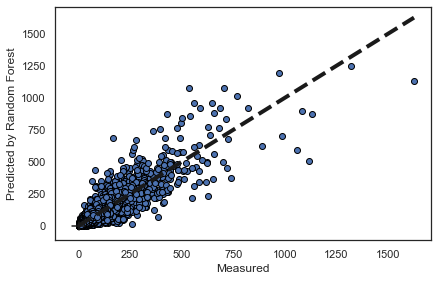

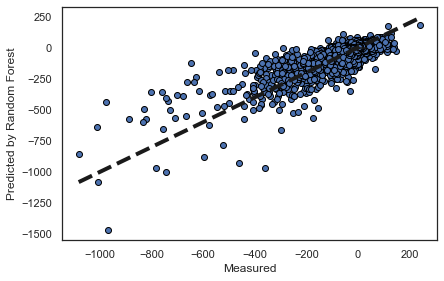

In [252]:
df_out['prediction'] = df_out['Median Sales']-df_out['Predicted']
plot_prediction(df_out['units_sold'],df_out['prediction'],"Random Forest")
plot_prediction(y_pred_random,y_dev['Difference'].values,"Random Forest")

In [253]:
print("Medians: "+str(sum(abs(df_out['Difference']))/df_out.shape[0]))
print("XGBRegressor: "+str(sum(abs(df_out['units_sold']-df_out['prediction']))/df_out.shape[0]))

Medians: 18.126689976689978
XGBRegressor: 14.042697097493514


In [255]:
rf_model = RandomForestRegressor(n_estimators=80, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=-1, random_state=None, 
                      verbose=1, warm_start=False)

#Train on data
rf_model.fit(train[selector], train['Difference'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    9.8s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=1, warm_start=False)

In [256]:
final_y_prediction = rf_model.predict(test[selector])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:    0.2s finished


In [257]:
testfile = pd.concat([test.reset_index(drop=True), pd.DataFrame(final_y_prediction)], axis=1)
testfile['prediction'] = testfile['Median Sales']-testfile[0]
testfile.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,...,Month,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,0,prediction
0,212645,2013-07-16,Store_8091,Product_216418,108.3000,108.3000,0,0,NaN,Test,...,Month_7,20.5,Store_8091Product_216418Month_72013-07-16 00:0...,2013-07-09,20.5,0.0,0.0,NaN,0.310625,20.189375
1,212646,2013-07-16,Store_8091,Product_216419,109.0125,109.0125,0,0,NaN,Test,...,Month_7,23.0,Store_8091Product_216419Month_72013-07-16 00:0...,2013-07-09,23.0,0.0,0.0,NaN,8.724375,14.275625
2,212647,2013-07-16,Store_8091,Product_216425,133.9500,133.9500,0,0,NaN,Test,...,Month_7,18.0,Store_8091Product_216425Month_72013-07-16 00:0...,2013-07-09,18.0,0.0,0.0,NaN,-2.809199,20.809199
3,212648,2013-07-16,Store_8091,Product_216233,133.9500,133.9500,0,0,NaN,Test,...,Month_7,25.0,Store_8091Product_216233Month_72013-07-16 00:0...,2013-07-09,25.0,0.0,0.0,NaN,-0.282265,25.282265
4,212649,2013-07-16,Store_8091,Product_217390,176.7000,176.7000,0,0,NaN,Test,...,Month_7,20.0,Store_8091Product_217390Month_72013-07-16 00:0...,2013-07-09,20.0,0.0,0.0,NaN,-2.026429,22.026429


In [190]:
sub = pd.read_csv('/run/media/devesh/Files/Projects/Demand Forecasting/input/sample_submission.csv')

In [193]:
sub.head()

,record_ID,units_sold
0,212645,0
1,212646,0
2,212647,0
3,212648,0
4,212649,0


In [203]:
testfile['prediction'].describe()

count    13860.000000
mean        46.786437
std         39.601114
min          0.000000
25%         22.250551
50%         35.543452
75%         58.739268
max        638.470337
Name: prediction, dtype: float64

In [200]:
testfile.loc[testfile['prediction'] < 0]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,...,Month,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,0,prediction
9644,226298,2013-10-09,Store_9132,Product_222087,130.3875,242.25,0,0,NaN,Test,...,Month_10,18.0,Store_9132Product_222087Month_102013-10-09 00:...,2013-10-02,18.0,0.0,0.0,NaN,25.313652,-7.313652


In [201]:
testfile['prediction'][9644] = 0

-7.313652038574219

In [258]:
for i in range(len(testfile)):
    if testfile['prediction'][i] < 0:
        testfile['prediction'][i] = 0

In [259]:
sub['units_sold'] = testfile['prediction']

In [260]:
sub.to_csv('rfr_first.csv',index = False)

In [261]:
df.to_csv('new_df.csv', index = False)